<a href="https://colab.research.google.com/github/Justabhi96/TF2.0/blob/master/14_RNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 50kB/s 
     |████████████████████████████████| 501kB 54.6MB/s 
     |████████████████████████████████| 3.1MB 60.0MB/s 


In [0]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Flatten, Input, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
X_train.shape

(60000, 28, 28)

In [0]:
cv2_imshow(X_train[0])

In [0]:
T, D = X_train[0].shape

In [0]:
i = Input(shape = (T, D))
x = LSTM(128, activation = None)(i)
x = Dense(10, activation = "softmax")(x)

model = Model(i, x)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.6154 - accuracy: 0.7746 - val_loss: 0.4553 - val_accuracy: 0.8310
Epoch 2/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.4279 - accuracy: 0.8423 - val_loss: 0.4170 - val_accuracy: 0.8480
Epoch 3/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.3763 - accuracy: 0.8610 - val_loss: 0.3842 - val_accuracy: 0.8593
Epoch 4/10
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.3457 - accuracy: 0.8708 - val_loss: 0.3583 - val_accuracy: 0.8706
Epoch 5/10
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.3207 - accuracy: 0.8802 - val_loss: 0.3631 - val_accuracy: 0.8680
Epoch 6/10
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.3028 - accuracy: 0.8864 - val_loss: 0.3437 - val_accuracy: 0.8744
Epoch 7/10
60000/60000 [==============================] 

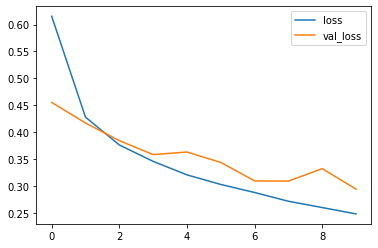

In [0]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

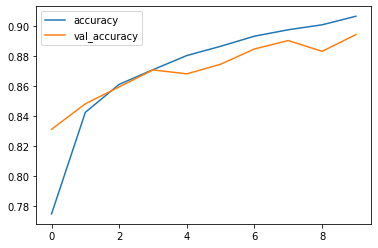

In [0]:
plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend()